In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("/Users/ccreanga/projects/Boundaries/TableS3_hamming", sep="\t", index_col=0)
df.head()

,Siciliano,Calabrese_Northern,Italian,Spanish,French,Portuguese,Romanian,Greek_Calabria,Greek,Greek_Cypriot,...,Kazakh,Kirghiz,Turkish,Buryat,Basque_Central,Basque_Western,Wolof,Malagasy,Archi,Lak
Siciliano,0.000,0.075,0.046,0.094,0.100,0.062,0.113,0.129,0.183,0.183,...,0.306,0.306,0.306,0.256,0.265,0.286,0.356,0.350,0.270,0.270
Calabrese_Northern,0.075,0.000,0.062,0.109,0.150,0.109,0.097,0.113,0.167,0.167,...,0.306,0.306,0.306,0.282,0.265,0.286,0.378,0.350,0.270,0.270
Italian,0.046,0.062,0.000,0.091,0.098,0.061,0.094,0.150,0.180,0.180,...,0.306,0.306,0.306,0.256,0.265,0.286,0.378,0.350,0.270,0.270
Spanish,0.094,0.109,0.091,0.000,0.098,0.045,0.125,0.153,0.150,0.150,...,0.278,0.278,0.278,0.282,0.229,0.250,0.409,0.375,0.278,0.278
French,0.100,0.150,0.098,0.098,0.000,0.082,0.133,0.161,0.175,0.175,...,0.314,0.314,0.314,0.308,0.277,0.292,0.381,0.310,0.297,0.297


In [3]:
indoeuropean_language_families = {
    "Romance": [
        "Siciliano",
        "Calabrese_Northern",
        "Italian",
        "Spanish",
        "French",
        "Portuguese",
        "Romanian",
    ],
    "Hellenic": [
        "Greek_Calabria",
        "Greek",
        "Greek_Cypriot",
    ],
    "Germanic": [
        "English",
        "Dutch",
        "Afrikaans",
        "German",
        "Danish",
        "Icelandic",
        "Faroese",
        "Norwegian",
    ],
    "Slavic": [
        "Bulgarian",
        "Serbo-Croatian",
        "Slovenian",
        "Polish",
        "Russian",
    ],
    "Celtic": [
        "Irish",
        "Welsh",
    ],
    "Indo-Iranian": [
        "Marathi",
        "Hindi",
        "Pashto",
    ],
}


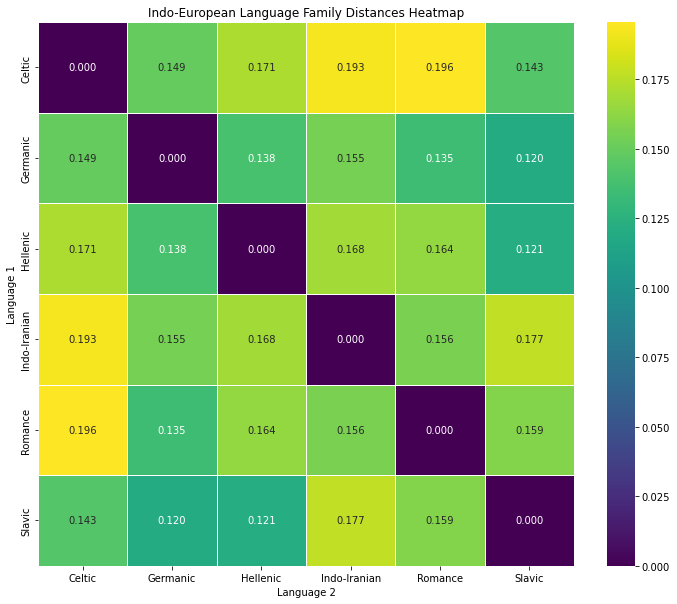

In [5]:

# Create a dictionary of family distances
family_distances = {}
for family1 in indoeuropean_language_families:
    for family2 in indoeuropean_language_families:
        if family1 == family2:
            # Distance to itself is 0
            family_distances[(family1, family2)] = 0
        else:
            # Calculate average distance between languages in each family
            family1_distances = []
            family2_distances = []
            for lang1 in indoeuropean_language_families[family1]:
                for lang2 in indoeuropean_language_families[family2]:
                    distance = df[lang1][lang2]
                    family1_distances.append(distance)
                    family2_distances.append(distance)
            family_distance = ((sum(family1_distances) / len(family1_distances)) + (sum(family2_distances) / len(family2_distances))) / 2
            family_distances[(family1, family2)] = family_distance

# Convert the dictionary to a DataFrame
df_h = pd.DataFrame([[k[0], k[1], v] for k, v in family_distances.items()], columns=['Language 1', 'Language 2', 'Distance'])

# Pivot the DataFrame for heatmap
heatmap_data = df_h.pivot_table(index='Language 1', columns='Language 2', values='Distance')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5)
plt.title('Indo-European Language Family Distances Heatmap')
plt.show()

In [9]:
indoeuropean_languages_without_celtic = [
    'Siciliano', 'Calabrese_Northern', 'Italian', 'Spanish', 'French', 'Portuguese',
    'Romanian', 'Greek_Calabria', 'Greek', 'Greek_Cypriot', 'English', 'Dutch', 'Afrikaans',
    'German', 'Danish', 'Icelandic', 'Faroese', 'Norwegian', 'Bulgarian', 'Serbo-Croatian',
    'Slovenian', 'Polish', 'Russian', 'Marathi','Hindi','Pashto'
]
celtic = ['Irish', 'Welsh']

In [17]:
(df['Romanian']['Irish'] + df['Romanian']['Welsh']) / 2

0.218

In [18]:
(df['Siciliano']['Irish'] + df['Siciliano']['Welsh']) / 2

0.179

In [ ]:
(df['Romanian']['Irish'] + df['Romanian']['Welsh'] + df['Siciliano']['Welsh'] + df['Siciliano']['Irish']) / 4

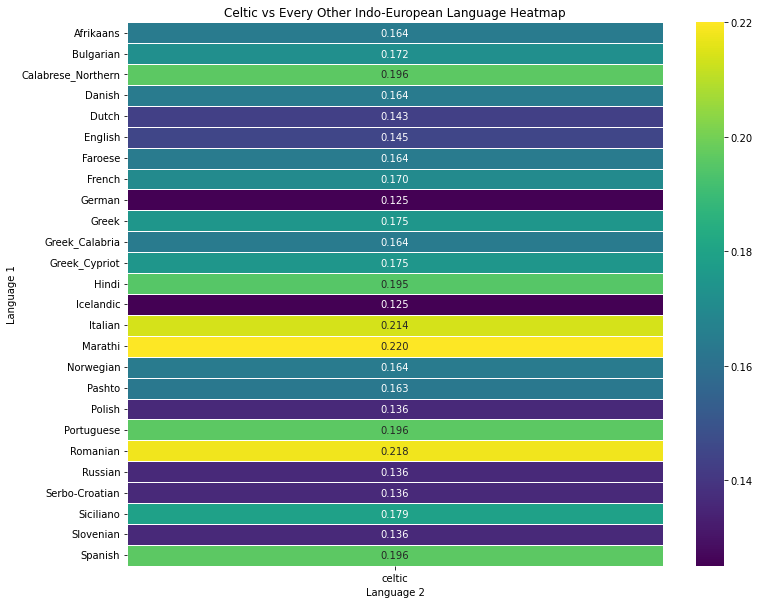

In [19]:
family_distances = {}
for lang in indoeuropean_languages_without_celtic:
    family1_distances = []
    family2_distances = []
    for lang2 in celtic:
        distance = df[lang][lang2]
        family1_distances.append(distance)
        family2_distances.append(distance)
    family_distance = ((sum(family1_distances) / len(family1_distances)) + (sum(family2_distances) / len(family2_distances))) / 2
    family_distances[(lang, "celtic")] = family_distance

family_distances
# Convert the dictionary to a DataFrame
df_h = pd.DataFrame([[k[0], k[1], v] for k, v in family_distances.items()], columns=['Language 1', 'Language 2', 'Distance'])

# Pivot the DataFrame for heatmap
heatmap_data = df_h.pivot_table(index='Language 1', columns='Language 2', values='Distance')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".3f", linewidths=.5)
plt.title('Celtic vs Every Other Indo-European Language Heatmap')
plt.show()

In [23]:
sum(family_distances.values()) / len(family_distances.values())

0.16811538461538467

In [25]:
indoeuropean_languages = [
    'Siciliano', 'Calabrese_Northern', 'Italian', 'Spanish', 'French', 'Portuguese',
    'Romanian', 'Greek_Calabria', 'Greek', 'Greek_Cypriot', 'English', 'Dutch', 'Afrikaans',
    'German', 'Danish', 'Icelandic', 'Faroese', 'Norwegian', 'Bulgarian', 'Serbo-Croatian',
    'Slovenian', 'Polish', 'Russian', 'Irish', 'Welsh', 'Marathi','Hindi','Pashto'
]

In [26]:
df_indo = df.loc[df.index.isin(indoeuropean_languages), df.columns.isin(indoeuropean_languages)]
df_indo

,Siciliano,Calabrese_Northern,Italian,Spanish,French,Portuguese,Romanian,Greek_Calabria,Greek,Greek_Cypriot,...,Bulgarian,Serbo-Croatian,Slovenian,Polish,Russian,Irish,Welsh,Marathi,Hindi,Pashto
Siciliano,0.000,0.075,0.046,0.094,0.100,0.062,0.113,0.129,0.183,0.183,...,0.140,0.152,0.152,0.130,0.152,0.179,0.179,0.178,0.156,0.149
Calabrese_Northern,0.075,0.000,0.062,0.109,0.150,0.109,0.097,0.113,0.167,0.167,...,0.158,0.152,0.152,0.130,0.152,0.196,0.196,0.200,0.178,0.170
Italian,0.046,0.062,0.000,0.091,0.098,0.061,0.094,0.150,0.180,0.180,...,0.169,0.149,0.149,0.128,0.149,0.214,0.214,0.178,0.156,0.149
Spanish,0.094,0.109,0.091,0.000,0.098,0.045,0.125,0.153,0.150,0.150,...,0.153,0.152,0.152,0.130,0.152,0.196,0.196,0.159,0.136,0.109
French,0.100,0.150,0.098,0.098,0.000,0.082,0.133,0.161,0.175,0.175,...,0.196,0.200,0.200,0.200,0.200,0.170,0.170,0.163,0.140,0.114
Portuguese,0.062,0.109,0.061,0.045,0.082,0.000,0.125,0.153,0.183,0.183,...,0.169,0.152,0.152,0.130,0.152,0.196,0.196,0.182,0.159,0.130
Romanian,0.113,0.097,0.094,0.125,0.133,0.125,0.000,0.138,0.186,0.186,...,0.161,0.178,0.178,0.178,0.178,0.218,0.218,0.182,0.159,0.130
Greek_Calabria,0.129,0.113,0.150,0.153,0.161,0.153,0.138,0.000,0.083,0.083,...,0.167,0.133,0.133,0.133,0.133,0.164,0.164,0.209,0.186,0.156
Greek,0.183,0.167,0.180,0.150,0.175,0.183,0.186,0.083,0.000,0.015,...,0.148,0.102,0.102,0.102,0.102,0.175,0.175,0.186,0.163,0.133
Greek_Cypriot,0.183,0.167,0.180,0.150,0.175,0.183,0.186,0.083,0.015,0.000,...,0.148,0.102,0.102,0.102,0.102,0.175,0.175,0.186,0.163,0.133


In [28]:
df_indo.mean().mean()

0.13115561224489797

In [49]:
art = pd.read_csv("/Users/ccreanga/projects/Boundaries/Artificial_Langs/random_distances_hamming.txt", names=["dist"])
art

,dist
Random,0.041
Random,0.043
Random,0.043
Random,0.044
Random,0.047
...,...
Random,0.541
Random,0.545
Random,0.553
Random,0.556


In [50]:
sum(art['dist'] > 0.524)

15

In [51]:
art['dist'].median()

0.246

In [66]:
art['dist'].median()

0.246

(58, 58)


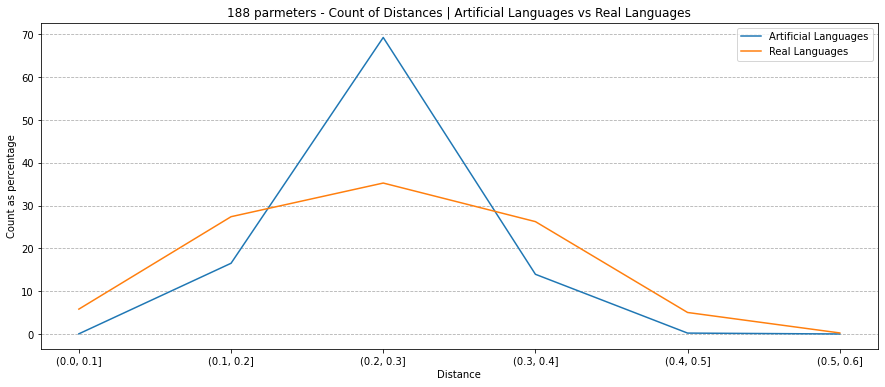

In [54]:
art = pd.read_csv("/Users/ccreanga/projects/Boundaries/Artificial_Langs/random_distances_hamming.txt", names=["dist"])
distance_counts = art['dist'].value_counts()
distance_counts = distance_counts.sort_values(ascending=False)

df = pd.read_csv("/Users/ccreanga/projects/Boundaries/TableS3_hamming", sep="\t", index_col=0)
print(df.shape)
df = df.melt()
distance_counts_real = df['value'].value_counts()
distance_counts_real = distance_counts_real.sort_values(ascending=False)


# Set the custom x-axis ticks
art['dist_bin'] = pd.cut(art['dist'], np.arange(0,0.7,0.1))
df['dist_bin'] = pd.cut(df['value'], np.arange(0,0.7,0.1))

# Count the occurrences of each bin
bin_counts = art['dist_bin'].value_counts()
bin_counts = round(bin_counts * 100 / 12497500, 3)
sorted_dist_bin_counts = bin_counts.sort_index()

bin_counts_df = df['dist_bin'].value_counts()
bin_counts_df = round(bin_counts_df * 100 / 3306, 3)
sorted_dist_bin_counts_df = bin_counts_df.sort_index()

# Create a bar plot
plt.figure(figsize=(15, 6))
sorted_dist_bin_counts.plot(label="Artificial Languages")
sorted_dist_bin_counts_df.plot(label="Real Languages")
# plt.xticks(custom_values, custom_xticks)
plt.xlabel('Distance')
plt.ylabel('Count as percentage')
plt.title('188 parmeters - Count of Distances | Artificial Languages vs Real Languages')
plt.grid(axis='y', linestyle='--')
plt.legend()

# # Display count values on top of bars
# for i, v in enumerate(sorted_dist_bin_counts):
#     plt.text(i, v + 0.3, str(v)+"%", ha='center', va='bottom')
    

plt.show()

In [57]:
items = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]
res = []
for item in items:
    res.append(round(len(art[art['dist'] <= item]) * 100 / 12497500, 3))
res

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001,
 0.004,
 0.012,
 0.035,
 0.082,
 0.196,
 0.426,
 0.839,
 1.597,
 2.825,
 4.696,
 7.442,
 11.352,
 16.559]

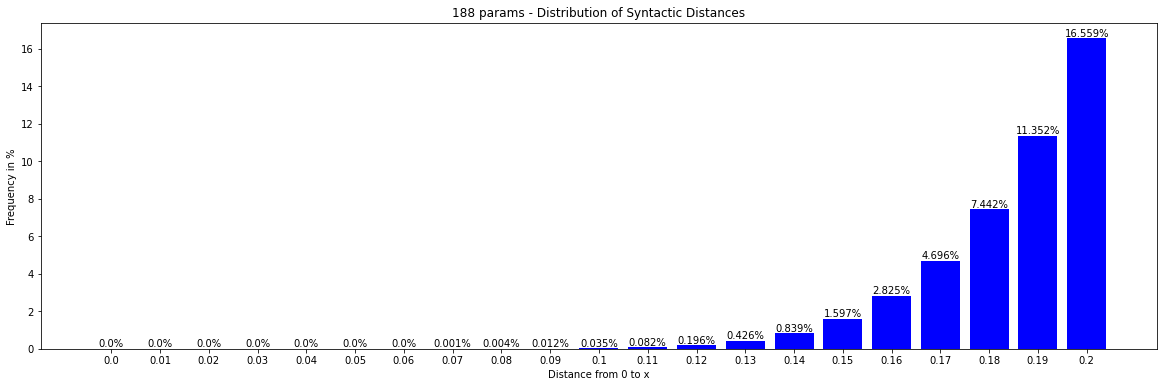

In [61]:
plt.figure(figsize=(20, 6))
plt.bar([str(x) for x in items], res, color='blue')
for i, v in enumerate(res):
    plt.text(i, v, str(v)+"%", ha='center', va='bottom')
plt.xlabel('Distance from 0 to x')
plt.ylabel('Frequency in %')
plt.title('188 params - Distribution of Syntactic Distances')
plt.show()

In [68]:
len(art[art['dist'] > 0.524]) * 100 / 12497500

0.0001200240048009602

In [69]:
len(indoeuropean_languages_without_celtic)

26